Name: Gowtham 
Reg. No:212225040099 
Ridge - Mean Squared Error: 1.47, R2 Score: -0.18
Lasso - Mean Squared Error: 1.29, R2 Score: -0.04
ElasticNet - Mean Squared Error: 1.33, R2 Score: -0.07


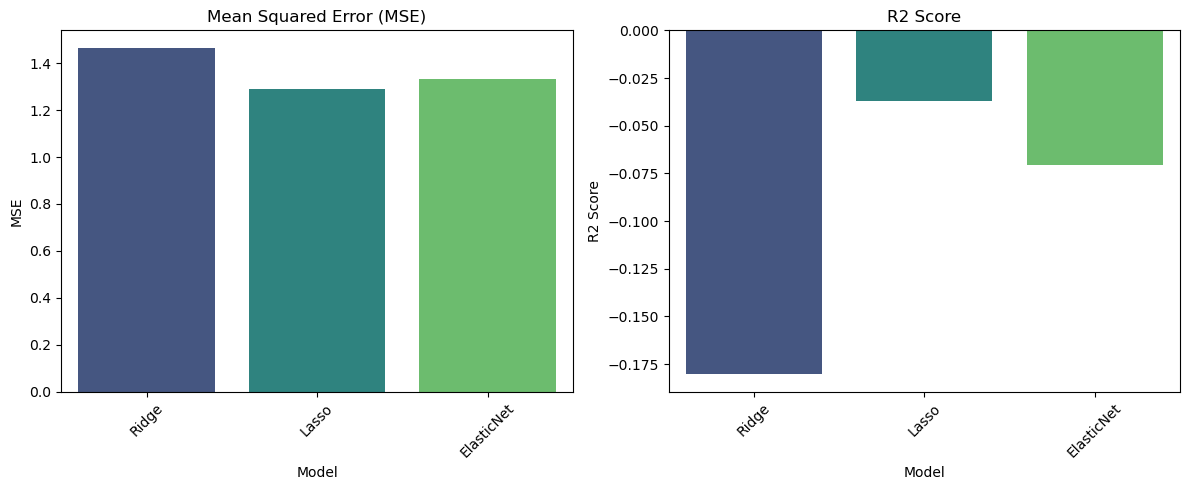

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

# Data preprocessing
data = pd.get_dummies(data, drop_first=True)

# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and pipelines
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[name] = {'MSE': mse, 'R2 Score': r2}

# Print results
print("Name: Gowtham ")
print("Reg. No:212225040099 ")
for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.2f}, R2 Score: {metrics['R2 Score']:.2f}")

# Visualization of the results
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(12, 5))

# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Bar plot for R2 Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='viridis')
plt.title('R2 Score')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()